### 分析
- 样本量：
    - 数据集：891用于训练测试模型，418用于预测
- 特征维度：如何归一化？
    - PassengerId: 数据id，不作为feature
    - Survived: 是否存活，作为label
    - Pcalss: 船舱等级，是否需要归一化？
    - Name：乘客姓名，是否需要作为feature？
    - Sex: 乘客性别，转化为0/1 feature
    - Age：乘客年龄
    - SIbSp: 兄弟姐妹/配偶的数量
    - Parch: 父母/孩子的数量
    - Ticket：机票号码
    - Fare：机票价格
    - Cabin: 客舱
    - Embarked: 登船的港口

In [79]:
# -- coding:utf-8 --
import seaborn as sns 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy
import matplotlib as mlt
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print(os.listdir("./"))

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'test.ipynb', 'Titanic.ipynb', 'train.csv']


In [2]:
# Load dataset
url_sub = './gender_submission.csv'
url_train = './train.csv'
url_test = './test.csv'
dataset_sub = pd.read_csv(url_sub)
dataset_train = pd.read_csv(url_train)
dataset_test = pd.read_csv(url_test)


In [ ]:
# data description
dataset_train.info()

In [ ]:
dataset_train.describe()

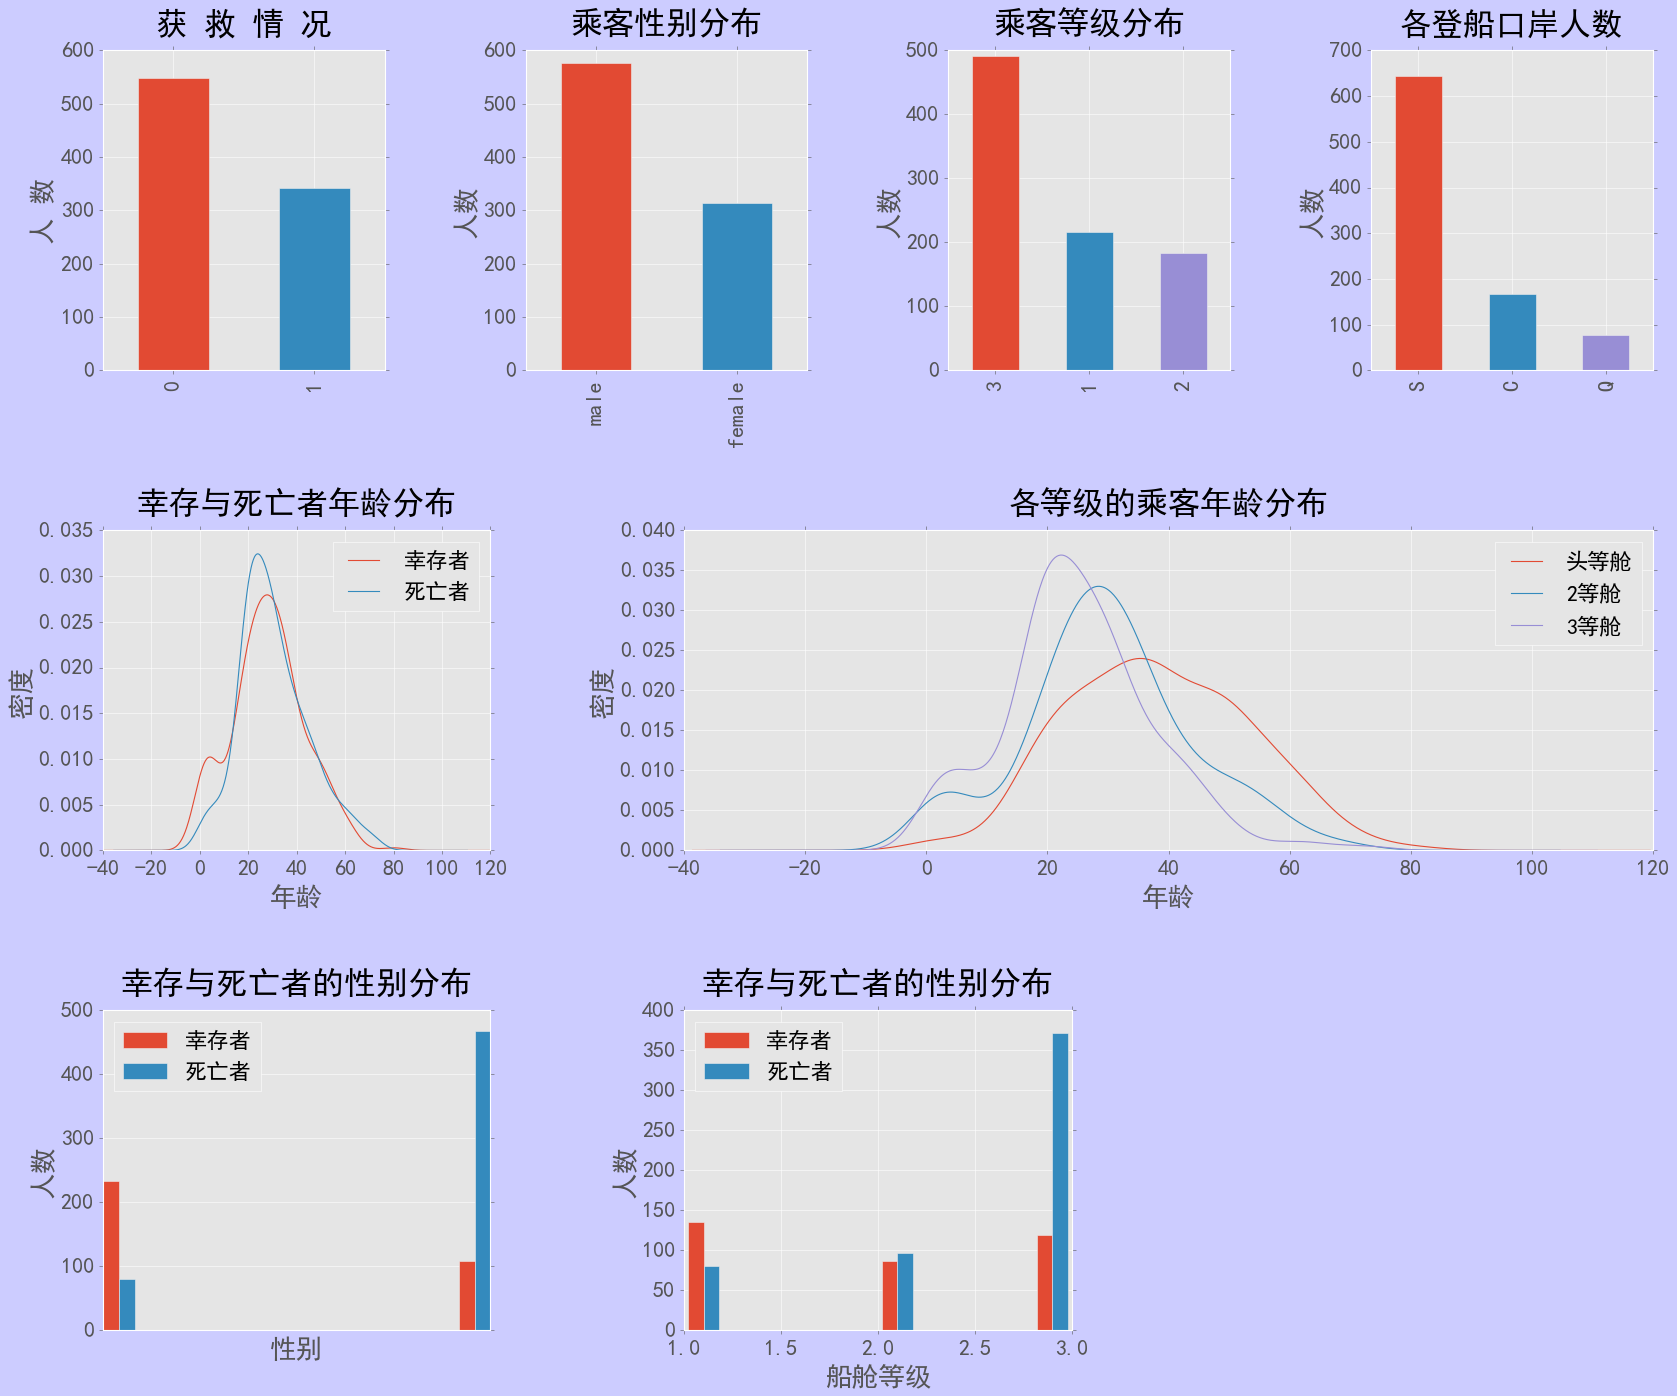

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

plt.style.use('ggplot')
fig = plt.figure(figsize = (25,20))


# plt.rcParams["figure.titlesize"] = 'medium'
plt.rcParams["legend.fontsize"] = 'medium'
plt.rcParams['axes.titlepad'] = 15
plt.rcParams["font.size"] = 20
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# data visualization
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.2)
plt.subplots_adjust(wspace =0.5, hspace =0.5)#调整子图间距


# 第一幅图展示获救情况（幸存者数量比例）
plt.subplot2grid((3,4),(0,0))
x = dataset_train.Survived.value_counts()
x.plot(kind='bar')
plt.title(u'获 救 情 况')
plt.ylabel(u'人 数')

# 第二幅图展示不同等级乘客分布
plt.subplot2grid((3,4),(0,1))
dataset_train.Sex.value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.title(u"乘客性别分布")

# 第二幅图展示不同等级乘客分布
plt.subplot2grid((3,4),(0,2))
dataset_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

# 展示各登岸口人数分布
plt.subplot2grid((3,4),(0,3))
dataset_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸人数")
plt.ylabel(u"人数")

# 第三幅图展示幸存与死亡者的年龄分布
plt.subplot2grid((3,3),(1,0))
# plt.scatter(dataset_train.Survived,dataset_train.Age)
dataset_train.Age[dataset_train.Survived == 1].plot(kind='kde')
dataset_train.Age[dataset_train.Survived == 0].plot(kind='kde')
plt.title(u'幸存与死亡者年龄分布')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u'幸存者',u'死亡者'),loc='best')

# 第四幅图展示各等级乘客的年龄分布
plt.subplot2grid((3,3),(1,1),colspan=2)
dataset_train.Age[dataset_train.Pclass == 1].plot(kind='kde')
dataset_train.Age[dataset_train.Pclass == 2].plot(kind='kde')
dataset_train.Age[dataset_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱',u'2等舱',u'3等舱'),loc='best')

# 第三幅图展示幸存与死亡者的性别分布
plt.subplot2grid((3,3),(2,0))
x = np.array(dataset_train.Sex[dataset_train.Survived == 1])
y = np.array(dataset_train.Sex[dataset_train.Survived == 0])
plt.hist([x,y], histtype='bar')
plt.title(u'幸存与死亡者的性别分布')
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.legend((u'幸存者',u'死亡者'),loc='best')

# 第三幅图展示幸存与死亡者的船舱等级分布
plt.subplot2grid((3,3),(2,1))
x = np.array(dataset_train.Pclass[dataset_train.Survived == 1])
y = np.array(dataset_train.Pclass[dataset_train.Survived == 0])
plt.hist([x,y], histtype='bar')
plt.title(u'幸存与死亡者的性别分布')
plt.xlabel(u"船舱等级")
plt.ylabel(u"人数")
plt.legend((u'幸存者',u'死亡者'),loc='best')




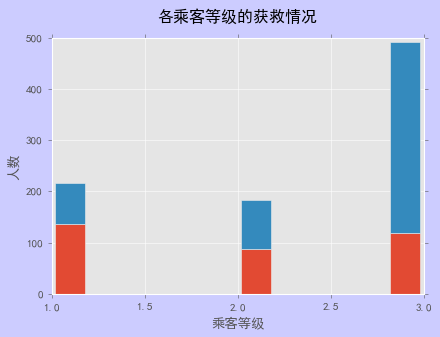

In [86]:
fig2 = plt.figure(figsize=(6,4))
plt.rcParams["font.size"] = 10
fig2.patch.set_facecolor('blue')
fig2.patch.set_alpha(0.2)

x = np.array(dataset_train.Pclass[dataset_train.Survived == 1])
y = np.array(dataset_train.Pclass[dataset_train.Survived == 0])
plt.hist([x,y], histtype='bar',stacked='True')

# plt.set_xlim([0,4])
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()
plt.close()

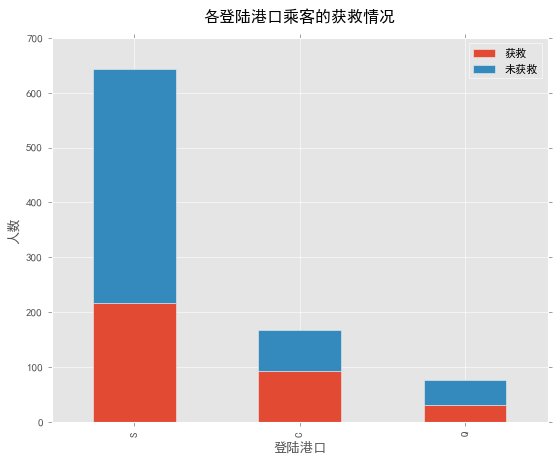

In [73]:
x = dataset_train.Embarked[dataset_train.Survived == 0].value_counts()
y = dataset_train.Embarked[dataset_train.Survived == 1].value_counts()

df = pd.DataFrame({u"获救":y,u"未获救":x})
df.plot(kind='bar',stacked='True')
plt.title(u"各登陆港口乘客的获救情况")
plt.xlabel(u"登陆港口")
plt.ylabel(u"人数")

plt.show()

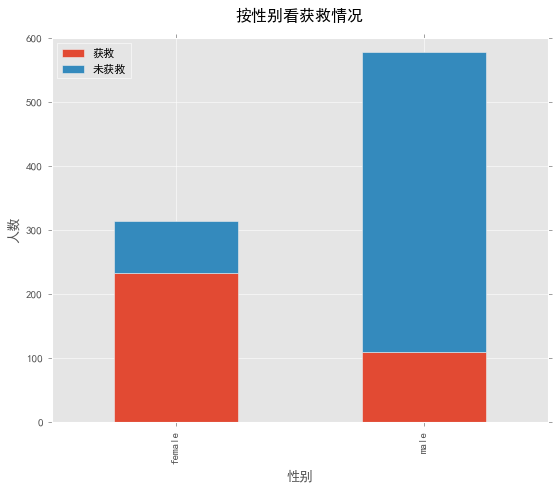

In [75]:
x = dataset_train.Sex[dataset_train.Survived == 0].value_counts()
y = dataset_train.Sex[dataset_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':y,u'未获救':x})
df.plot(kind='bar',stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

E:\conda\envs\python36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [166]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    df.drop(np.where(np.isnan(df[['Fare', 'Parch', 'SibSp', 'Pclass']]))[0])

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].dropna().as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr,predictedAges

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_all = dataset_train.append(dataset_test).reset_index(drop = True)
data_train, rfr,pre = set_missing_ages(data_all)
data_train = set_Cabin_type(data_all)

E:\conda\envs\python36\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [107]:
print(np.where(np.isnan(data_all[['Fare', 'Parch', 'SibSp', 'Pclass']]))[0])

[1043]


In [167]:
data_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,No,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.000000,Yes,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.000000,No,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.000000,Yes,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.000000,No,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,23.676551,No,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.000000,Yes,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.000000,No,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.000000,No,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.000000,No,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [168]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Cabin
dummies_Cabin.Cabin_Yes.value_counts()

0    1014
1     295
Name: Cabin_Yes, dtype: int64

In [139]:
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')


In [169]:
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df


,Age,Fare,Parch,PassengerId,SibSp,Survived,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.000000,7.2500,0,1,1,0.0,1,0,0,0,1,0,1,0,0,1
1,38.000000,71.2833,0,2,1,1.0,0,1,1,0,0,1,0,1,0,0
2,26.000000,7.9250,0,3,0,1.0,1,0,0,0,1,1,0,0,0,1
3,35.000000,53.1000,0,4,1,1.0,0,1,0,0,1,1,0,1,0,0
4,35.000000,8.0500,0,5,0,0.0,1,0,0,0,1,0,1,0,0,1
5,23.676551,8.4583,0,6,0,0.0,1,0,0,1,0,0,1,0,0,1
6,54.000000,51.8625,0,7,0,0.0,0,1,0,0,1,0,1,1,0,0
7,2.000000,21.0750,1,8,3,0.0,1,0,0,0,1,0,1,0,0,1
8,27.000000,11.1333,2,9,0,1.0,1,0,0,0,1,1,0,0,0,1
9,14.000000,30.0708,0,10,1,1.0,1,0,1,0,0,1,0,0,1,0


In [184]:
import sklearn.preprocessing as preprocessing


scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(np.array(df['Age']).reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(np.array(df['Fare']).reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1), fare_scale_param)


E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [185]:
df

,Age,Fare,Parch,PassengerId,SibSp,Survived,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,22.000000,7.2500,0,1,1,0.0,1,0,0,0,1,0,1,0,0,1,-0.565569,-0.502445
1,38.000000,71.2833,0,2,1,1.0,0,1,1,0,0,1,0,1,0,0,0.607573,0.786845
2,26.000000,7.9250,0,3,0,1.0,1,0,0,0,1,1,0,0,0,1,-0.272283,-0.488854
3,35.000000,53.1000,0,4,1,1.0,0,1,0,0,1,1,0,1,0,0,0.387609,0.420730
4,35.000000,8.0500,0,5,0,0.0,1,0,0,0,1,0,1,0,0,1,0.387609,-0.486337
5,23.676551,8.4583,0,6,0,0.0,1,0,0,1,0,0,1,0,0,1,-0.442641,-0.478116
6,54.000000,51.8625,0,7,0,0.0,0,1,0,0,1,0,1,1,0,0,1.780715,0.395814
7,2.000000,21.0750,1,8,3,0.0,1,0,0,0,1,0,1,0,0,1,-2.031996,-0.224083
8,27.000000,11.1333,2,9,0,1.0,1,0,0,0,1,1,0,0,0,1,-0.198962,-0.424256
9,14.000000,30.0708,0,10,1,1.0,1,0,1,0,0,1,0,0,1,0,-1.152139,-0.042956


In [182]:
from sklearn import linear_model

# 用正则取出我们要的属性值
df = df.dropna()
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf


E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
E:\conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\conda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=1e-06, verbose=0, warm_start=False)

In [186]:
data_test = pd.read_csv("./test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test


E:\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


ValueError: Expected 2D array, got 1D array instead:
array=[34.5        47.         62.         27.         22.         14.
 30.         26.         18.         21.         27.87851446 46.
 23.         63.         47.         24.         35.         21.
 27.         45.         55.          9.         41.8337619  21.
 48.         50.         22.         22.5        41.         23.12169881
 50.         24.         33.         17.94240967 30.         18.5
 29.47723483 21.         25.         29.40364242 39.         46.22590529
 41.         30.         45.         25.         45.         32.7195201
 60.         36.         24.         27.         20.         28.
 28.55115139 10.         35.         25.         24.74440244 36.
 17.         32.         18.         22.         13.         29.80709784
 18.         47.         31.         60.         24.         21.
 29.         28.5        35.         32.5        29.47723483 55.
 30.         24.          6.         67.         49.         27.87851446
 31.51563672 20.31340233 27.         18.         32.7195201   2.
 22.         26.30767954 27.         29.47723483 25.         25.
 76.         29.         20.         33.         43.         27.
 32.7195201  26.         16.         28.         21.         32.7195201
 28.52241225 18.5        41.         26.30767954 36.         18.5
 63.         18.         35.67834167  1.         36.         29.
 12.         30.65611101 35.         28.         32.7195201  17.
 22.         22.99940655 42.         24.         32.         53.
 40.15547996 30.65335    43.         24.         26.5        26.
 23.         40.         10.         33.         61.         28.
 42.         31.         50.33597679 22.         46.22590529 30.
 23.         27.87851446 60.5        36.         13.         24.
 29.         23.         42.         26.         21.38568948  7.
 26.         38.88511584 41.         26.         48.         18.
 39.94809655 22.         29.42179683 27.         23.         23.63447294
 40.         15.         20.         54.         36.         64.
 30.         37.         18.         32.7195201  27.         40.
 21.         17.         13.31520503 40.         34.         44.04963972
 11.5        61.          8.         33.          6.         18.
 23.         22.77020464 31.66336672  0.33       47.          8.
 25.         47.50612408 35.         24.         33.         25.
 32.         27.24063477 17.         60.         38.         42.
 22.58913328 57.         50.         29.47723483 30.         21.
 22.         21.         53.         23.64204167 23.         32.7195201
 40.5        36.         14.         21.         21.         22.58913328
 39.         20.         64.         20.         18.         48.
 55.         45.         45.         24.73457526 17.94240967 41.
 22.         42.         29.         20.31340233  0.92       20.
 27.         24.         32.5        29.42179683 32.7195201  28.
 19.         21.         36.5        21.         29.          1.
 30.         27.87851446 41.43272076 29.42179683 29.47723483 17.
 46.         32.7195201  26.         32.34703041 27.86944813 20.
 28.         40.         30.         22.         23.          0.75
 32.7195201   9.          2.         36.         30.43548837 24.
 23.63447294 29.47723483 41.15945595 30.         23.63447294 53.
 36.         26.          1.         23.12169881 30.         29.
 32.         32.06586548 43.         24.         32.7195201  64.
 30.          0.83       55.         45.         18.         22.
 31.00027321 37.         55.         17.         57.         19.
 27.         22.         26.         25.         26.         33.
 39.         23.         12.         46.         29.         21.
 48.         39.         27.86944813 19.         27.         30.
 32.         39.         25.         23.63447294 18.         32.
 41.24736847 58.         15.01938042 16.         26.         38.
 24.         31.         45.         25.         18.         49.
  0.17       50.         59.         22.58913328 32.7195201  30.
 14.5        24.         31.         27.         25.         41.24736847
 19.52800494 22.         45.         29.         21.         31.
 49.         44.         54.         45.         22.         21.
 55.          5.         32.7195201  26.         27.46589524 19.
 34.56395914 24.         24.         57.         21.          6.
 23.         51.         13.         47.         29.         18.
 24.         48.         22.         31.         30.         38.
 22.         17.         43.         20.         23.         50.
 21.69868155  3.         32.7195201  37.         28.         29.47723483
 39.         38.5        29.47723483 25.68669665].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.